In [30]:
# Tejas Gulur
# EE 592A - HW 3

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io.wavfile as wav
import scipy.signal as sig

# Radar/system constants used in Doppler calculation
RADAR_FREQ = 10.5e9           # Hz
C = 3e8                        # m/s
WAVELENGTH = C / RADAR_FREQ    # m

def plot_spectrogram_and_speed(wav_filename, show_plot=True):
    # Car velocity profile for verification
    duration_sec = 15
    car_v0, car_acc = 26.8, 0.5
    # true_ms = [car_v0 + sec * car_acc for sec in range(1, duration_sec+1)]
    # true_mph = [v * 2.23694 for v in true_ms]

    sample_rate, samples = wav.read(wav_filename)
    if samples.ndim > 1:
        samples = samples[:,0]
    duration = samples.shape[0] / sample_rate

    nperseg = 1024
    noverlap = nperseg // 2
    f, t, Sxx = sig.spectrogram(samples, sample_rate, nperseg=nperseg, noverlap=noverlap)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, Sxx, shading='gouraud', norm=colors.LogNorm(vmin=Sxx.min()+1e-6, vmax=Sxx.max()))
    plt.title("Spectrogram")
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Power Spectral Density')
    plt.tight_layout()
    if show_plot:
        plt.show()

    # Compute average noise power at 3900 Hz bin across all time
    hz_bin_3900 = np.argmin(np.abs(f - 3900))
    avg_noise_power_3900 = np.mean(Sxx[hz_bin_3900])
    print(f"Average noise power at 3900 Hz: {int(round(avg_noise_power_3900))} units")

    for sec in range(1, int(duration)+1):
        col = np.argmin(np.abs(t - sec))
        powers = Sxx[:, col]
        max_idx = np.argmax(powers)
        max_power = powers[max_idx]
        fd = f[max_idx]
        v_ms = (WAVELENGTH * fd) / 2
        v_mph = v_ms * 2.23694
        
        if max_power < avg_noise_power_3900:
            print(f"t = {sec:2d} s, no target, actual v = {true_ms[sec-1]:6.2f} m/s, {true_mph[sec-1]:6.2f} MPH")
        else:
            print(
                f"t = {sec:2d} s, v = {v_ms:6.2f} m/s, v = {v_mph:6.2f} MPH, "
                f"target power {int(round(max_power))} "
               #f"actual v = {true_ms[sec-1]:6.2f} m/s, {true_mph[sec-1]:6.2f} MPH"
            )
    
    return plt.gcf()

WAV file saved: car_infinite_rcs.wav
Average noise power at 3900 Hz: 0 units
t =  1 s, v =  27.34 m/s, v =  61.17 MPH, target power 50020744 
t =  2 s, v =  27.79 m/s, v =  62.16 MPH, target power 61613024 
t =  3 s, v =  28.35 m/s, v =  63.41 MPH, target power 40760444 
t =  4 s, v =  28.79 m/s, v =  64.41 MPH, target power 60258956 
t =  5 s, v =  29.24 m/s, v =  65.41 MPH, target power 31967766 
t =  6 s, v =  29.80 m/s, v =  66.66 MPH, target power 60656788 
t =  7 s, v =  30.25 m/s, v =  67.66 MPH, target power 42062704 
t =  8 s, v =  30.80 m/s, v =  68.91 MPH, target power 61502088 
t =  9 s, v =  31.36 m/s, v =  70.15 MPH, target power 36422956 
t = 10 s, v =  31.81 m/s, v =  71.15 MPH, target power 58521280 
t = 11 s, v =  32.25 m/s, v =  72.15 MPH, target power 36362176 
t = 12 s, v =  32.81 m/s, v =  73.40 MPH, target power 52160432 
t = 13 s, v =  33.26 m/s, v =  74.40 MPH, target power 46166532 
t = 14 s, v =  33.82 m/s, v =  75.65 MPH, target power 60673220 
t = 15 s, v =

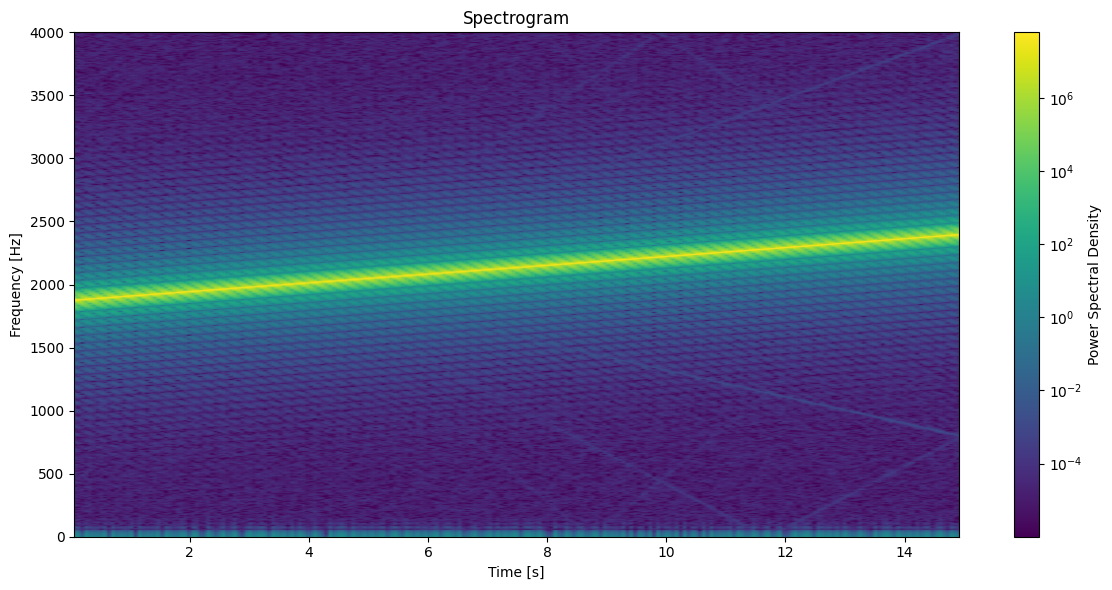

In [31]:
def generate_test_wav_infinite_rcs(filename="car_infinite_rcs.wav"):
    duration = 15
    fs = 8000
    sim_timevec = np.linspace(0, duration, duration * fs)
    car_v0 = 26.8
    car_acc = 0.5
    radar_freq = 10.5e9
    c = 3e8
    v = car_v0 + sim_timevec * car_acc
    fd = 2 * radar_freq * v / c
    # Infinite RCS: set amplitude constant
    amp = 1.0
    car_sig = amp * np.cos(2 * np.pi * np.cumsum(fd / fs))
    car_sig = (car_sig / np.max(np.abs(car_sig))) * 32767
    car_sig = car_sig.astype(np.int16)
    wav.write(filename, fs, car_sig)
    print(f"WAV file saved: {filename}")
    return filename

filename = generate_test_wav_infinite_rcs()
fig = plot_spectrogram_and_speed(filename, show_plot=False)
fig.savefig("spectrogram_car_infinite_rcs.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

WAV file saved: car_rcs_awgn.wav
Average noise power at 3900 Hz: 0 units
t =  1 s, v =  27.34 m/s, v =  61.17 MPH, target power 81 
t =  2 s, v =  27.79 m/s, v =  62.16 MPH, target power 6 
t =  3 s, v =  28.24 m/s, v =  63.16 MPH, target power 2 
t =  4 s, v =  49.67 m/s, v = 111.10 MPH, target power 2 
t =  5 s, v =   7.59 m/s, v =  16.98 MPH, target power 2 
t =  6 s, v =  26.34 m/s, v =  58.92 MPH, target power 2 
t =  7 s, v =  56.25 m/s, v = 125.83 MPH, target power 1 
t =  8 s, v =  40.74 m/s, v =  91.13 MPH, target power 2 
t =  9 s, v =  26.12 m/s, v =  58.42 MPH, target power 2 
t = 10 s, v =  55.58 m/s, v = 124.33 MPH, target power 3 
t = 11 s, v =  13.95 m/s, v =  31.21 MPH, target power 2 
t = 12 s, v =  42.75 m/s, v =  95.62 MPH, target power 1 
t = 13 s, v =  39.84 m/s, v =  89.13 MPH, target power 3 
t = 14 s, v =  37.39 m/s, v =  83.64 MPH, target power 2 
t = 15 s, v =  29.13 m/s, v =  65.16 MPH, target power 1 


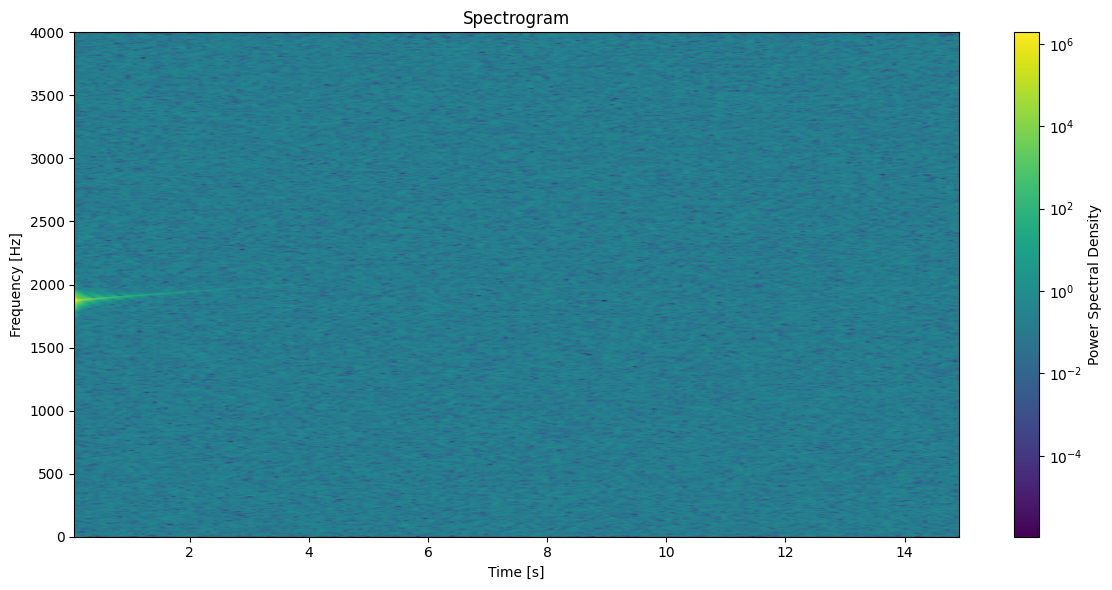

In [32]:
def generate_test_wav_car_rcs_noise(filename="car_rcs_awgn.wav"):
    duration = 15
    fs = 8000
    sim_timevec = np.linspace(0, duration, duration * fs)
    car_rcs = 100
    car_x0, car_v0, car_acc = 1, 26.8, 0.5
    radar_freq = 10.5e9
    c = 3e8

    v = car_v0 + sim_timevec * car_acc
    fd = 2 * radar_freq * v / c
    car_pos = car_x0 + car_v0 * sim_timevec + 0.5 * car_acc * sim_timevec ** 2
    amp = np.power(car_rcs, 0.5) * np.power(car_pos, -2)
    car_sig = amp * np.cos(2 * np.pi * np.cumsum(fd / fs))
    car_sig = (car_sig / np.max(np.abs(car_sig))) * 32767
    # Add -60 dBFS AWGN
    awgn_db = -60
    noise_power_linear = 10**(awgn_db/10)
    noise_std = np.sqrt(noise_power_linear * 32767**2)
    noise = noise_std * np.random.randn(len(car_sig))
    out_sig = car_sig + noise
    out_sig = (out_sig / np.max(np.abs(out_sig))) * 32767
    out_sig = out_sig.astype(np.int16)
    wav.write(filename, fs, out_sig)
    print(f"WAV file saved: {filename}")
    return filename

filename = generate_test_wav_car_rcs_noise()
fig = plot_spectrogram_and_speed(filename, show_plot=False)
fig.savefig("spectrogram_car_rcs_awgn.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()